In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns


In [5]:
data= {
    'Area (sq f)': [2600,3000,3200,3600,4000],
    'Price (BDT)': [550000,565000,610000,680000,725000]
}
#Create a DataFrame from the dictionary

df= pd.DataFrame(data)
display(df)

,Area (sq f),Price (BDT)
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


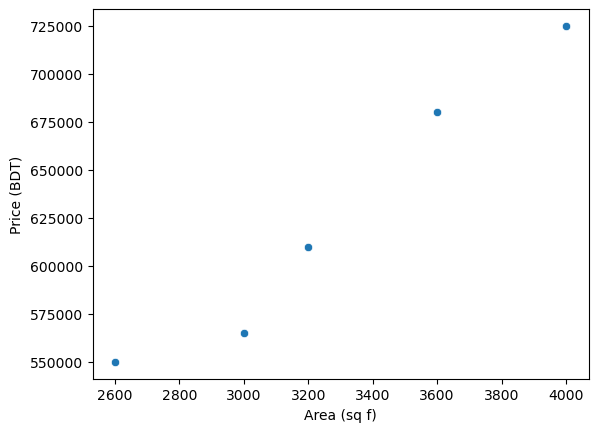

In [7]:
sns.scatterplot(data=df, x="Area (sq f)", y="Price (BDT)")
plt.show()

In [9]:
model = linear_model.LinearRegression()  # Create an object for linear regression
model.fit(df[['Area (sq f)']], df[['Price (BDT)']])  # Fit the model to the data


LinearRegression()

In [11]:
a=df[["Area (sq f)"]]
b=df["Price (BDT)"]
type(a),type(b)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(a,b)

LinearRegression()

In [17]:
# Extract m and c
m = model.coef_
c = model.intercept_

print(f"Slope (m): {m}")
print(f"coefficient(c): {c}")


Slope (m): [135.78767123]
coefficient(c): 180616.43835616432


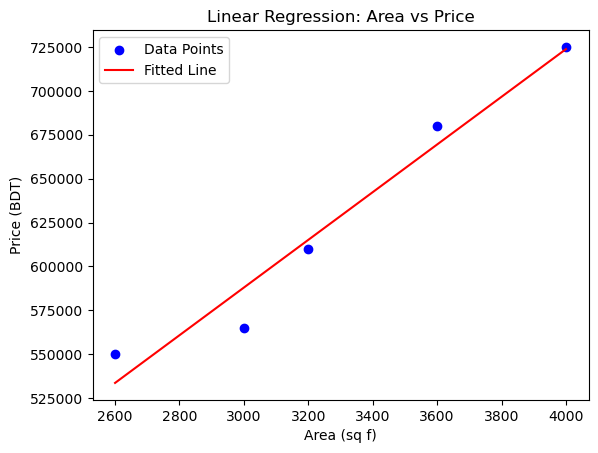

In [19]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(a,b, color='blue', label='Data Points')

# Plot the fitted line
plt.plot(a, model.predict(a), color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Area (sq f)')
plt.ylabel('Price (BDT)')
plt.title('Linear Regression: Area vs Price')
plt.legend()

# Show the plot
plt.show()

# multiple linear regreesstion

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [23]:
data = {
    "Area (sq f)": [2600, 3000, 3200, 3600, 4000],
    'Bedroom': [3, 4, np.nan, 3, 5],
    'Age': [20, 15, 18, 30, 8],
    "Price (BDT)": [550000, 565000, 610000, 595000, 760000]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
display(df)


#median_bedroom

,Area (sq f),Bedroom,Age,Price (BDT)
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
# handle missing value

#df["Bedroom"]= df["Bedroom"].fillna(df["Bedroom"].median())
#print(df)

In [25]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # সংখ্যা টাইপ ডেটার জন্য
        df[column].fillna(df[column].mean(), inplace=True)  # গড় দিয়ে পূরণ
    elif df[column].dtype == 'object':  # অবজেক্ট টাইপ ডেটার জন্য
        df[column].fillna(df[column].mode()[0], inplace=True)  # মোড দিয়ে পূরণ

display(df)

C:\Users\6510s\AppData\Local\Temp\ipykernel_2112\117432273.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # গড় দিয়ে পূরণ


,Area (sq f),Bedroom,Age,Price (BDT)
0,2600,3.00,20,550000
1,3000,4.00,15,565000
2,3200,3.75,18,610000
3,3600,3.00,30,595000
4,4000,5.00,8,760000


### model k Linear regression call kore fit kora model k

In [27]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model with the corrected syntax
model.fit(df[["Area (sq f)", "Bedroom", "Age"]], df[["Price (BDT)"]])

LinearRegression()

### Single vabe alada alda plot kora loop babohar kore

In [ ]:
#features = ["Area (sq f)", "Bedroom", "Age"]

#for feature in features:
    #sns.scatterplot(x=df[feature], y=df["Price (BDT)"])
    #plt.xlabel(feature)
    #plt.ylabel("Price (BDT)")
   # plt.title(f"{feature} vs Price")
    #plt.show()

## Visualization of the fitted model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


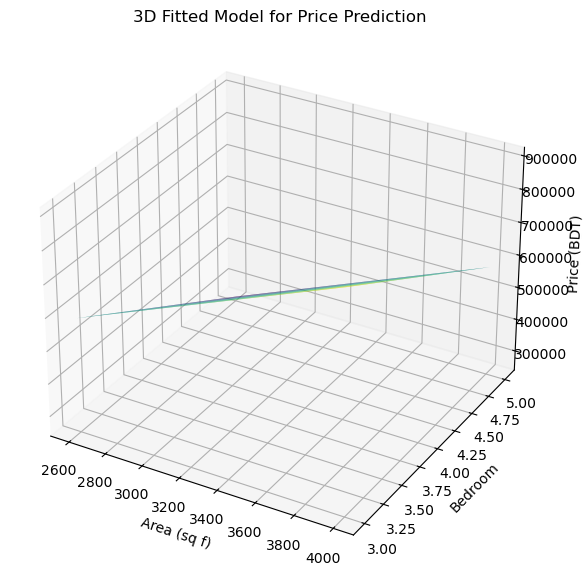

In [29]:
# MAKE 3D Map

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a mesh grid for plotting
x = np.linspace(df['Area (sq f)'].min(), df['Area (sq f)'].max(), 100)
y = np.linspace(df['Bedroom'].min(), df['Bedroom'].max(), 100)
x, y = np.meshgrid(x, y)

# Create a grid of the other feature 'Age' (using the median to keep it constant for visualization)
z = np.linspace(df['Age'].min(), df['Age'].max(), 100)
z = np.full_like(x, df['Age'].median())

# Predict the price for each combination of 'Area (sq f)' and 'Bedroom', keeping 'Age' constant
predicted_price = model.predict(np.c_[x.ravel(), y.ravel(), z.ravel()])
predicted_price = predicted_price.reshape(x.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, predicted_price, cmap='viridis')

# Labels and title
ax.set_xlabel('Area (sq f)')
ax.set_ylabel('Bedroom')
ax.set_zlabel('Price (BDT)')
ax.set_title('3D Fitted Model for Price Prediction')

# Show the plot
plt.show()

In [31]:
## find out the coefficient
coefficient = model.coef_
intercept= model.intercept_
print("Coefficients (m):", coefficient)
print("Intercept (b):", intercept)

Coefficients (m): [[    230.59826103 -167936.0972381   -18554.36548529]]
Intercept (b): [827087.52030808]


In [33]:
Predict_price=model.predict([[3300, 5, 10]])
print(f"House Price:{Predict_price}")

House Price:[[562837.64065227]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 10 ta feature thakle kmne predict korbo

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [37]:
data = {
    "Area (sq f)": [2600, 3000, 3200, 3600, 4000],
    "Bedrooms": [3, 4, 3, 3, 5],
    "Bathrooms": [2, 3, 2, 2, 3],
    "Location": ["City Center", "Suburbs", np.nan, "Rural", "City Center"],
    "Age": [20, 15, np.nan, 30, 8],
    "Nearby Schools": [5, 4, 3, 2, 6],
    "Nearby Hospitals": [2, np.nan, 3, 1, 2],
    "Crime Rate": [0.1, 0.2, 0.15, 0.3, 0.05],
    "Transport Accessibility": [9, 7, 6, 5, 10],
    "Environment Score": [8.5, 7.8, 6.2, 5.5, 9.1],
    "Price (BDT)": [550000, 565000, 610000, 595000, 760000]
}
df = pd.DataFrame(data)
display(df)

,Area (sq f),Bedrooms,Bathrooms,Location,Age,Nearby Schools,Nearby Hospitals,Crime Rate,Transport Accessibility,Environment Score,Price (BDT)
0,2600,3,2,City Center,20.0,5,2.0,0.10,9,8.5,550000
1,3000,4,3,Suburbs,15.0,4,NaN,0.20,7,7.8,565000
2,3200,3,2,NaN,NaN,3,3.0,0.15,6,6.2,610000
3,3600,3,2,Rural,30.0,2,1.0,0.30,5,5.5,595000
4,4000,5,3,City Center,8.0,6,2.0,0.05,10,9.1,760000


In [39]:
# solve the all missing dataset

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # সংখ্যা টাইপ ডেটার জন্য
        df[column].fillna(df[column].mean(), inplace=True)  # গড় দিয়ে পূরণ
    elif df[column].dtype == 'object':  # অবজেক্ট টাইপ ডেটার জন্য
        df[column].fillna(df[column].mode()[0], inplace=True)  # মোড দিয়ে পূরণ

display(df)

C:\Users\6510s\AppData\Local\Temp\ipykernel_2112\2859714088.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # গড় দিয়ে পূরণ
C:\Users\6510s\AppData\Local\Temp\ipykernel_2112\2859714088.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,Area (sq f),Bedrooms,Bathrooms,Location,Age,Nearby Schools,Nearby Hospitals,Crime Rate,Transport Accessibility,Environment Score,Price (BDT)
0,2600,3,2,City Center,20.00,5,2.0,0.10,9,8.5,550000
1,3000,4,3,Suburbs,15.00,4,2.0,0.20,7,7.8,565000
2,3200,3,2,City Center,18.25,3,3.0,0.15,6,6.2,610000
3,3600,3,2,Rural,30.00,2,1.0,0.30,5,5.5,595000
4,4000,5,3,City Center,8.00,6,2.0,0.05,10,9.1,760000


In [41]:
print(df.columns)

Index(['Area (sq f)', 'Bedrooms', 'Bathrooms', 'Location', 'Age',
       'Nearby Schools', 'Nearby Hospitals', 'Crime Rate',
       'Transport Accessibility', 'Environment Score', 'Price (BDT)'],
      dtype='object')


In [43]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])

print(df)

   Area (sq f)  Bedrooms  Bathrooms  Location    Age  Nearby Schools  \
0         2600         3          2         0  20.00               5   
1         3000         4          3         2  15.00               4   
2         3200         3          2         0  18.25               3   
3         3600         3          2         1  30.00               2   
4         4000         5          3         0   8.00               6   

   Nearby Hospitals  Crime Rate  Transport Accessibility  Environment Score  \
0               2.0        0.10                        9                8.5   
1               2.0        0.20                        7                7.8   
2               3.0        0.15                        6                6.2   
3               1.0        0.30                        5                5.5   
4               2.0        0.05                       10                9.1   

   Price (BDT)  
0       550000  
1       565000  
2       610000  
3       595000  
4      

In [45]:
X = df.drop('Price (BDT)', axis=1)  # ফিচারগুলো
y = df['Price (BDT)'] 

In [47]:
# model Fit kora

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [49]:
## find out the coefficient
coefficient = model.coef_
intercept= model.intercept_
print("Coefficients (m):", coefficient)
print("Intercept (b):", intercept)

Coefficients (m): [   127.23061901  -3705.53795682  -4687.02512284 -12637.85679916
  -2843.59690631   3238.22166867   4957.96944666   -693.23517021
   6550.42895371     47.93194802]
Intercept (b): 211163.98696062015


In [59]:
new_data = pd.DataFrame({
    "Area (sq f)": [3500],
    "Bedrooms": [4],
    "Bathrooms": [3],
    "Location": ["City Center"],
    "Age": [10],
    "Nearby Schools": [5],
    "Nearby Hospitals": [2],
    "Crime Rate": [0.05],
    "Transport Accessibility": [8],
    "Environment Score": [9.2]
})

# Encode the 'Location' column in new_data using the same LabelEncoder
new_data['Location'] = label_encoder.fit_transform(new_data['Location'])

# Predict house price
predicted_price = model.predict(new_data)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 679475.098893476


In [ ]:
# Over view of multiple Linear Regression Mod

In [53]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Training dataset
data = {
    "Area (sq f)": [2600, 3000, 3200, 3600, 4000],
    "Bedrooms": [3, 4, 3, 3, 5],
    "Bathrooms": [2, 3, 2, 2, 3],
    "Location": ["City Center", "Suburbs", "Rural", "Rural", "City Center"],
    "Age": [20, 15, 18, 30, 8],
    "Nearby Schools": [5, 4, 3, 2, 6],
    "Nearby Hospitals": [2, 1, 3, 1, 2],
    "Crime Rate": [0.1, 0.2, 0.15, 0.3, 0.05],
    "Transport Accessibility": [9, 7, 6, 5, 10],
    "Environment Score": [8.5, 7.8, 6.2, 5.5, 9.1],
    "Price (BDT)": [550000, 565000, 610000, 595000, 760000]
}

df = pd.DataFrame(data)

# Label encode 'Location' for the training data
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])

# Define features (X) and target (y)
X = df.drop('Price (BDT)', axis=1)
y = df['Price (BDT)']

# Train the LinearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# New data for prediction
new_data = pd.DataFrame({
    "Area (sq f)": [3500],
    "Bedrooms": [4],
    "Bathrooms": [3],
    "Location": ["City Center"],  # Location remains as a string here
    "Age": [10],
    "Nearby Schools": [5],
    "Nearby Hospitals": [2],
    "Crime Rate": [0.05],
    "Transport Accessibility": [8],
    "Environment Score": [9.2]
})

# Encode the 'Location' column in new_data using the same LabelEncoder
new_data['Location'] = label_encoder.transform(new_data['Location'])

# Predict house price
predicted_price = model.predict(new_data)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 679475.098893476


# Logistic Regression

In [15]:
#Logistic Regression: হলো একটি Supervised Machine Learning Algorithm, যা সাধারণত Binary Classification Problems 
#(যেমন Yes/No, 0/1, True/False) সমাধানের জন্য ব্যবহৃত হয়।

#এটি Regression Model হলেও, এর মূল কাজ হলো classification, যেখানে এটি একটি নির্দিষ্ট input-এর ভিত্তিতে output-এর probability নির্ধারণ করে।

In [ ]:
#Linear Regression-এর ধারণা ব্যবহার করে একটি স্কোর বের করা হয়
#➝ z = b0 + b1*x (যেখানে b0 = intercept, b1 = coefficient, এবং x = input feature)

#এই স্কোরকে "Sigmoid Function" দিয়ে Probability-তে রূপান্তর করা হয়
#➝ P(Y=1) = 1 / (1 + e^(-z))

#যদি Probability ≥ 0.5 হয়, তাহলে output = 1, নাহলে 0

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [45]:
data = {
    "Age": [22, 25, 47, 52, 46, 56, 55, 60, 62,
           61, 18,28, 27, 29, 49, 55, 25, 58, 19, 18,
           21, 26, 40, 45, 50, 54, 23],
    "Possibility": [0,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,
                   1,1,1,1,0]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

print(df)

    Age  Possibility
0    22            0
1    25            0
2    47            1
3    52            0
4    46            1
5    56            1
6    55            0
7    60            1
8    62            1
9    61            1
10   18            0
11   28            0
12   27            0
13   29            0
14   49            1
15   55            1
16   25            1
17   58            1
18   19            0
19   18            0
20   21            0
21   26            0
22   40            1
23   45            1
24   50            1
25   54            1
26   23            0


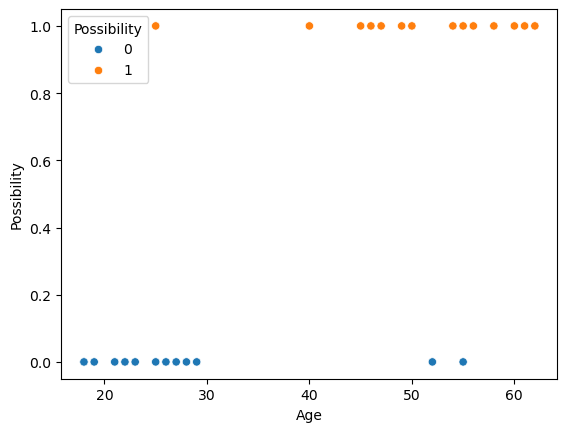

In [47]:
sns.scatterplot(x='Age', y= 'Possibility', data = df,color ='b',
                hue = 'Possibility')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    df[['Age']], df[['Possibility']], test_size=0.2)
display(xtrain)
display(ytrain)


,Age
21,26
8,62
18,19
11,28
22,40
25,54
19,18
14,49
10,18
13,29


,Possibility
21,0
8,1
18,0
11,0
22,1
25,1
19,0
14,1
10,0
13,0


In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


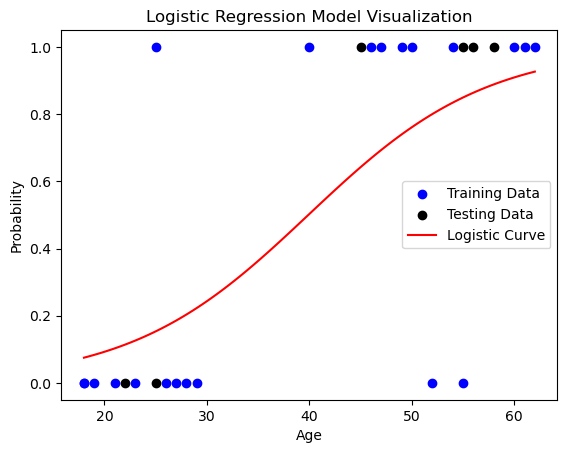

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of values for Age (feature)
x_range = np.linspace(xtrain['Age'].min(), xtrain['Age'].max(), 100).reshape(-1, 1)

# Predict probabilities for each point in the range
y_prob = model.predict_proba(x_range)[:, 1]  # Probability of class 1

# Plot data points
plt.scatter(xtrain, ytrain, color='blue', label='Training Data')
plt.scatter(xtest, ytest, color='black', label='Testing Data')

# Plot logistic regression curve
plt.plot(x_range, y_prob, color='red', label='Logistic Curve')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Logistic Regression Model Visualization')
plt.legend()
plt.show()

In [59]:
ypredict = model.predict(xtest)
print(ypredict)
print(ytest)

[1 1 0 1 0 1]
    Possibility
17            1
5             1
0             0
23            1
1             0
15            1


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypredict)
cm

array([[2, 0],
       [0, 4]], dtype=int64)

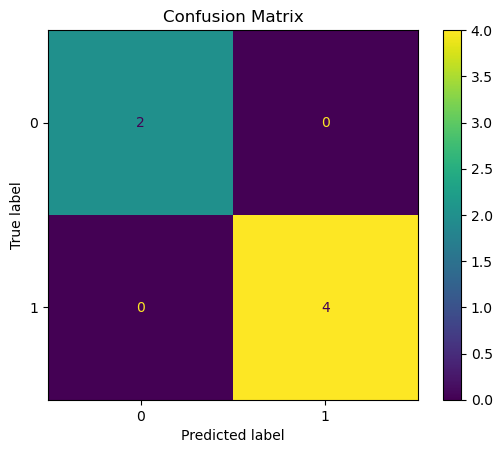

In [63]:
# confusion matrix can show right and wrong answers

from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)
plt.title('Confusion Matrix')
plt.show()

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


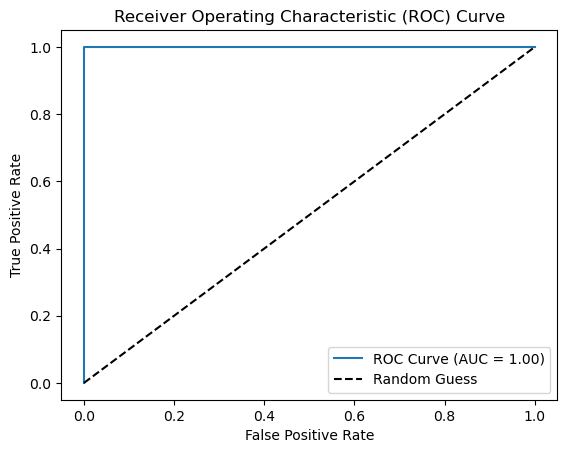

In [67]:
## Roc curve shows the permformace of the model

from sklearn.metrics import roc_curve, auc

# Compute probabilities
y_test_prob = model.predict_proba(xtest)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [69]:
### this curve means there is no error. if there is any distruction not in align
### with x axis or Y axis then the model is bad permormance

### Exmaples of Logistic Regression

In [13]:
# Logistic   Regression:
Comment="""problem statement: A company wants to predict whether a customer will purchase 
a product (1) or not (0) based on their age and estimated salary. 
We have a dataset containing customer age, salary, and their purchase decision. 
We will use logistic regression to build a predictive model. """

print(Comment)

problem statement: A company wants to predict whether a customer will purchase 
a product (1) or not (0) based on their age and estimated salary. 
We have a dataset containing customer age, salary, and their purchase decision. 
We will use logistic regression to build a predictive model. 


Model Accuracy: 0.45
Confusion Matrix:
 [[12  3]
 [19  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.80      0.52        15
           1       0.67      0.24      0.35        25

    accuracy                           0.45        40
   macro avg       0.53      0.52      0.44        40
weighted avg       0.56      0.45      0.42        40



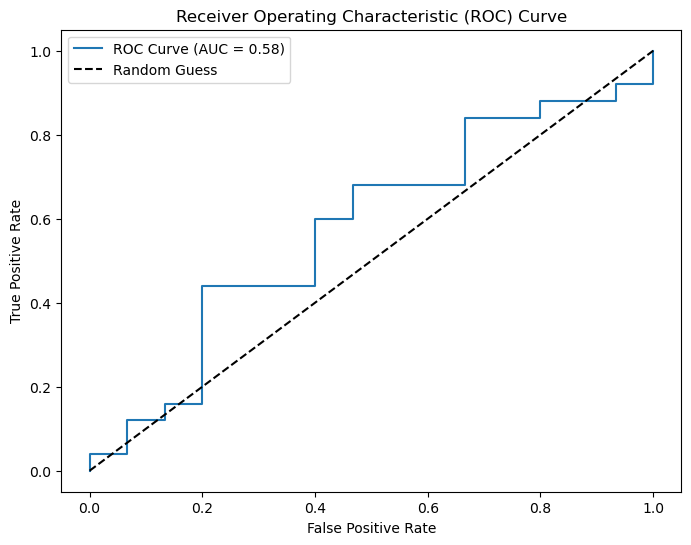

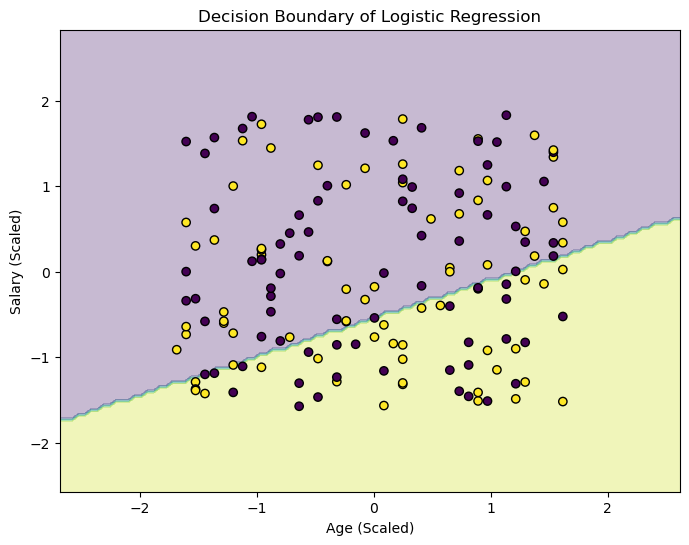

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Step 1: Generate a synthetic dataset
data = {
    'Age': np.random.randint(18, 60, 200),  # Random ages between 18 and 60
    'Salary': np.random.randint(20000, 100000, 200),  # Random salaries between 20K and 100K
    'Purchased': np.random.choice([0, 1], 200)  # Random 0 or 1 for purchase decision
}
df = pd.DataFrame(data)

# Step 2: Define Features and Target Variable
X = df[['Age', 'Salary']]  # Independent variables
Y = df['Purchased']        # Dependent variable

# Step 3: Split Data into Training and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Feature Scaling (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Step 6: Predict on Test Data
Y_pred = model.predict(X_test)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

# Step 8: Plot ROC Curve
# Compute probabilities
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Step 9: Visualizing Decision Boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    
    # Define min/max values for the meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # Predict on meshgrid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Age (Scaled)')
    plt.ylabel('Salary (Scaled)')
    plt.title('Decision Boundary of Logistic Regression')
    plt.show()

plot_decision_boundary(X_train, Y_train.values, model)